# 2.2 Choose your features (variables)!

In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [2]:
features = pd.read_csv("features.csv")

In [3]:
features=features.drop(['Unnamed: 0'], axis=1)

Before normalizing the variables, it is necessary to select the numeric ones: 

In [17]:
num_cols = features.select_dtypes(include=['int64', 'float64', 'int32']).columns

### To normalise or not to normalise? That's the question

In this case normalization is necessary since the comparison is between variables with different magnitudes and characteristics. To interpret properly, these features need to be on the same scale. 

In [15]:
minmax = MinMaxScaler()

In [29]:
features.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace = True)

In [30]:
for col in num_cols:
    fill_value = features[col].mean()
    features[col].fillna(fill_value, inplace=True)

In [31]:
features[num_cols] = minmax.fit_transform(features[num_cols])
features[num_cols]

,n_transactions,n_transactions_100,average_amount,average_balance,utilisation,min_trans,max_trans,min_accountbalance,max_accountbalance,account_balance_sup50k,...,n_normal_transactions,acc_bal_range,percent_availability,first_half_transactions,second_half_transactions,first_months_transactions,last_months_transactions,median_amount,first_quartile_amount,third_quartile_amount
0,0.2,0.333333,0.001637,0.000664,0.013653,0.000228,0.003045,0.000283,0.001045,0.25,...,0.2,0.000762,1.0,0.2,0.166667,0.00,0.4,0.001637,0.000932,0.002341
1,0.0,0.166667,0.000961,0.000210,0.013215,0.000961,0.000961,0.000210,0.000210,0.00,...,0.0,0.000000,1.0,0.0,0.166667,0.00,0.2,0.000961,0.000961,0.000961
2,0.2,0.333333,0.000466,0.000870,0.013873,0.000160,0.000772,0.000334,0.001407,0.25,...,0.2,0.001073,1.0,0.0,0.333333,0.25,0.2,0.000466,0.000313,0.000619
3,0.0,0.000000,0.000019,0.000004,0.013024,0.000019,0.000019,0.000004,0.000004,0.00,...,0.0,0.000000,1.0,0.0,0.166667,0.00,0.2,0.000019,0.000019,0.000019
4,0.0,0.166667,0.003205,0.000757,0.013724,0.003205,0.003205,0.000757,0.000757,0.25,...,0.0,0.000000,1.0,0.0,0.166667,0.00,0.2,0.003205,0.003205,0.003205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884260,0.0,0.166667,0.000443,0.001157,0.014156,0.000443,0.000443,0.001157,0.001157,0.25,...,0.2,0.000000,1.0,0.2,0.000000,0.00,0.2,0.000443,0.000443,0.000443
884261,0.0,0.166667,0.000142,0.000835,0.013843,0.000142,0.000142,0.000835,0.000835,0.25,...,0.2,0.000000,1.0,0.0,0.166667,0.00,0.2,0.000142,0.000142,0.000142
884262,0.0,0.166667,0.000081,0.000048,0.013067,0.000081,0.000081,0.000048,0.000048,0.00,...,0.0,0.000000,1.0,0.0,0.166667,0.00,0.2,0.000081,0.000081,0.000081
884263,0.0,0.000000,0.000032,0.000307,0.013323,0.000032,0.000032,0.000307,0.000307,0.00,...,0.2,0.000000,1.0,0.0,0.166667,0.00,0.2,0.000032,0.000032,0.000032


After normalization has been applied, it is possible to proceed with principal component analysis. Since the exercise requires a percentage of explained variance >70%, the most appropriate number of principal components turns out to be 4, with a total explained variance equal to 79%. If 3 components were chosen, the explained variance in our case would turn out to be 68%.

In [59]:
pca = PCA(n_components=4)

In [60]:
pca_features = pca.fit_transform(features[num_cols])

In [61]:
pca_features

array([[ 0.02159565,  0.37953109, -0.02801758,  0.15395316],
       [-0.07346689, -0.04242453, -0.1093801 , -0.11240164],
       [-0.11900419,  0.28492005,  0.27558898, -0.0786157 ],
       ...,
       [ 0.08943892, -0.05039707, -0.10210086, -0.05800698],
       [-0.14862432, -0.03563719, -0.11919064, -0.04942727],
       [ 0.22495462, -0.04799951, -0.08238435, -0.04938467]])

In [69]:
round(pca.explained_variance_ratio_.sum(),3)

0.796

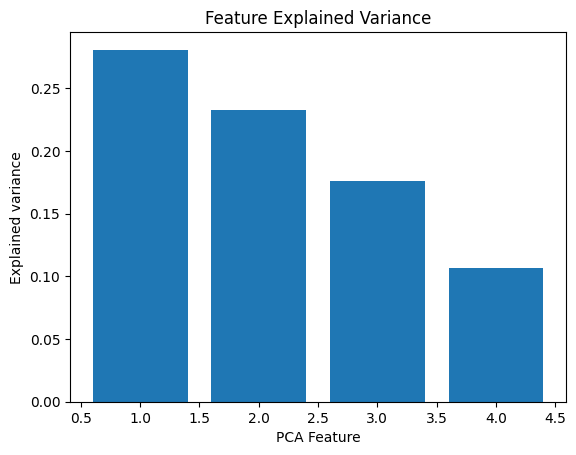

In [67]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_ratio_
    )
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

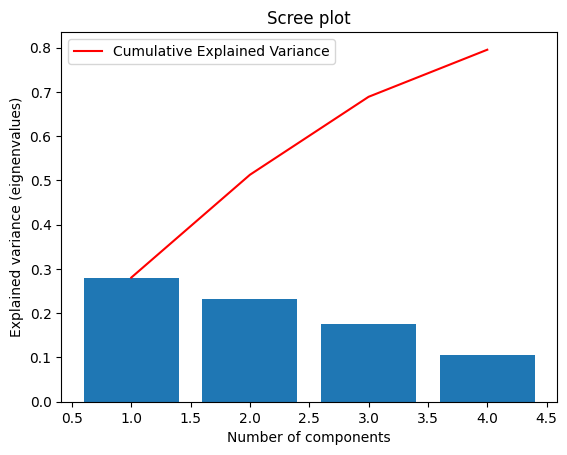

In [71]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()